# Interrogate PCMDI-AMIP-1-1-9 input data to ascertain differences

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xcdat as xc

## Mark example

In [ ]:
ds=xc.open_dataset('/p/user_pub/PCMDIobs/obs4MIPs_input/MOHC/HadISST1-1/v20230526/HadISST.1.1.sst.nc', lon_orient=(0, 360))
ds['sst'][-10:,90,-2:]

In [ ]:
len(ds.longitude)

In [ ]:
ds['sst'].sel(time='2022-12-16').plot()

## interrogate local data

In [5]:
ds1 = xc.open_dataset('SST_1-1-9-release/MODEL.SST.HAD187001-198110.OI198111-202301.nc') ; # ds1
ds2 = xc.open_dataset('/p/user_pub/PCMDIobs/obs4MIPs_input/NOAA-PSL/OISST2-0/v20230526/OISST.2.0.sst.mnmean.nc')
#ds3 = xc.open_dataset('SST_1-1-0-release/230503/oiv2mon.202212')
# https://kpegion.github.io/Pangeo-at-AOES/examples/read-fortran-binary.html

2023-11-01 21:43:09,484 [WARNING]: dataset.py(decode_time:402) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2023-11-01 21:43:09,484 [WARNING]: dataset.py(decode_time:402) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.


In [6]:
ds2

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2, bnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 1981-12-01 00:00:00 ... 2023-01-01 00:00:00
Dimensions without coordinates: nbnds, bnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) object ...
    lon_bnds   (lon, bnds) float32 0.0 1.0 1.0 2.0 ... 358.0 359.0 359.0 360.0
    lat_bnds   (lat, bnds) float32 90.0 89.0 89.0 88.0 ... -89.0 -89.0 -90.0
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

i: 0
i: 1


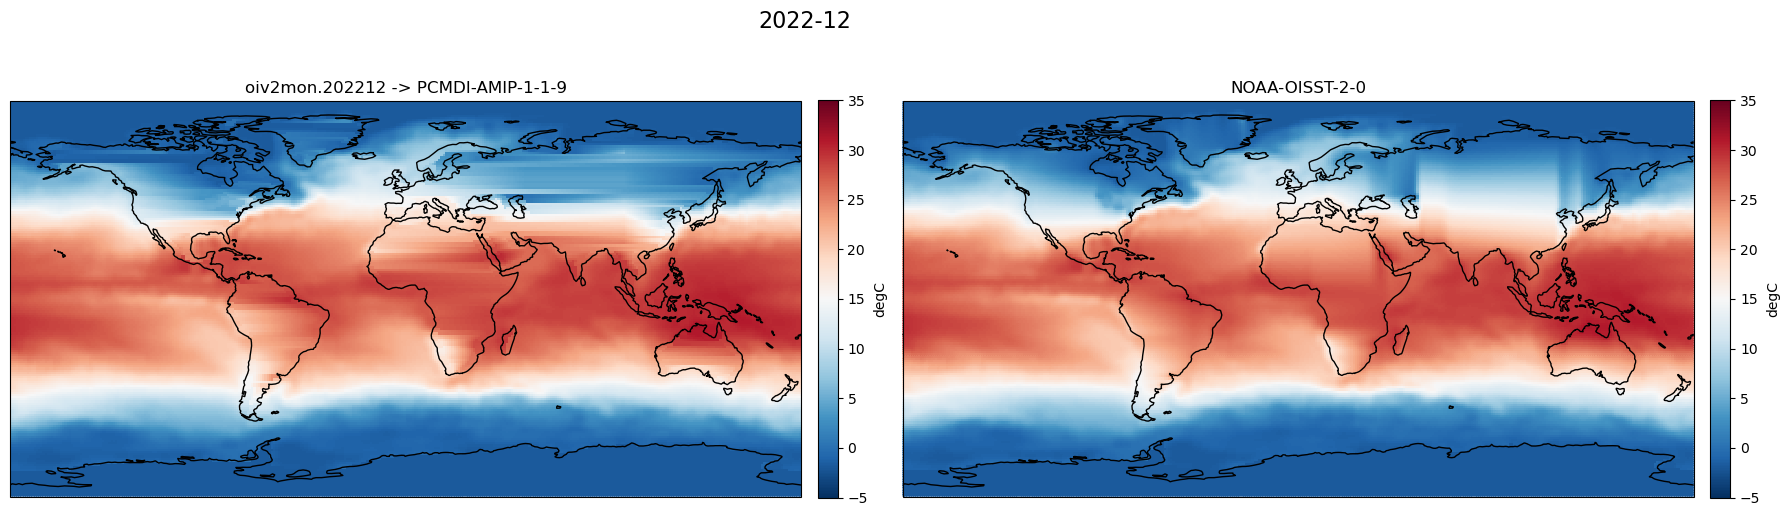

In [7]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))
fig.suptitle('2022-12',x=.45,y=0.95,fontsize=16)

# axes is a 2 dimensional array of `GeoAxes` - flatten into 1-D array
axes = axes.flatten()

# Loop over data
for i in np.arange(0,2):
    print("i:", i)
    if i == 0:
        data = ds1['SST'].sel(time='2022-12-16')
        lons = ds1['lon']
        lats = ds1['lat']
        titleTxt = 'oiv2mon.202212 -> PCMDI-AMIP-1-1-9'
    elif i == 1:
        data = ds2['sst'].sel(time='2022-12-01')
        lons = ds2['lon']
        lats = ds2['lat']
        titleTxt = 'NOAA-OISST-2-0'

    # Colour plot
    cs = axes[i].pcolor(lons, lats, data.squeeze(),
                      transform = ccrs.PlateCarree(),
                      cmap='RdBu_r', vmin=-5, vmax=35)
    # add colorbar
    fig.colorbar(cs, ax=axes[i], fraction=0.024, pad=0.02, label='degC')
    # Title each subplot
    axes[i].set_title(titleTxt)
    # Draw the coastines
    axes[i].coastlines()

plt.tight_layout()
plt.show()

In [8]:
ds3

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180, time: 1837, bnds: 2)
Coordinates:
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time       (time) object 1870-01-16 12:00:00 ... 2023-01-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    date       (time) int32 ...
    datesec    (time) int32 ...
    date_frac  (time) float64 ...
    SEAICE     (time, lat, lon) float32 ...
    lon_bnds   (lon, bnds) float32 0.0 1.0 1.0 2.0 ... 358.0 359.0 359.0 360.0
    lat_bnds   (lat, bnds) float32 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
Attributes:
    creation_date:             Mon Apr  7 14:46:31 MDT 2008
    creator:                   Dennis Shea, CGD
    story:                     \nClara Deser and Jim Hurrell wanted a SST and...
    title:                     ICE: Merged: HADLEY 187001-198110 with  NCEP O...
    history:                   Wed May  3 11:01:32 2023: ncrcat /p/user_pub/c...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 5.1.5 (Homepage = htt...

2023-11-01 21:51:01,547 [WARNING]: dataset.py(open_dataset:128) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2023-11-01 21:51:01,547 [WARNING]: dataset.py(open_dataset:128) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


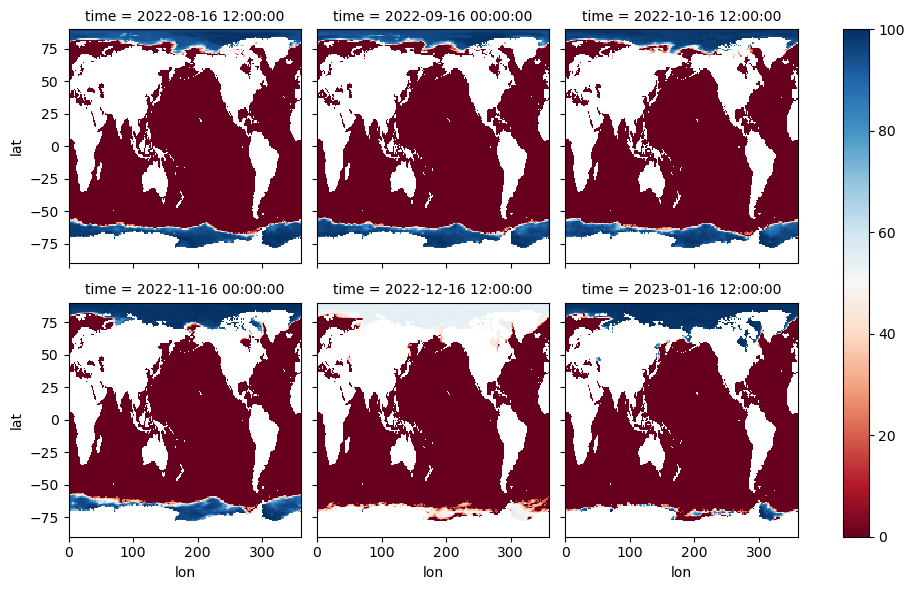

In [2]:
ds3 = xc.open_dataset('SST_1-1-9-release/MODEL.ICE.HAD187001-198110.OI198111-202301.nc')
BCpath = '/p/user_pub/work/input4MIPs/CMIP6Plus/CMIP/PCMDI/PCMDI-AMIP-1-1-9'
tos = xr.open_dataset(BCpath+'/ocean/mon/tos/gn/v20230512/tos_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn_187001-202212.nc')
sst = tos['tos']
sftof = xc.open_dataset(BCpath+'/ocean/fx/sftof/gn/v20230512/sftof_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn.nc')
ocn = sftof['sftof']
sic = ds3['SEAICE']
# apply landsea mask
ice = xr.where(ocn==100, sic, np.nan) # mask where land, otherwise sea ice
plt.close()
ice.isel(time=slice(-6,None)).plot(col='time',col_wrap=3,cmap='RdBu')